<a href="https://colab.research.google.com/github/kunalsonalkar/transformers-nlp/blob/main/Dataset_Prep_%7C_Image_Classification_Food101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the dataset to use in VGG-Net Classification

In [1]:
import torch
import torchvision

import torchvision.datasets as datasets
import torchvision.transforms as transforms

import pathlib
data_dir = pathlib.Path("../data")

# Download Data

In [2]:
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              download=True)
test_data = datasets.Food101(root=data_dir,
                              split="test",
                              download=True)

100%|██████████| 4996278331/4996278331 [03:22<00:00, 24698505.07it/s]


Extracting ../data/food-101.tar.gz to ../data


In [3]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ../data
    split=train

In [4]:
class_names = train_data.classes
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [5]:
train_data[0][0]
class_names[train_data[0][1]]

'churros'

# Sampling only 4 classes
1. "pizza"
2. "breakfast burrito"
3. "apple pie"
4. "sushi"
5. "steak"

In [6]:
import random
data_path = data_dir / "food-101" / "images"
target_classes = ["breakfast_burrito","pizza","sushi","steak","apple_pie"]

# get 20% of the data

amount_to_get = 0.2

def get_subset(image_path=data_path,
               data_splits=["train","test"],
               target_classes = ["breakfast_burrito","pizza","sushi","steak","apple_pie"],
               amount=0.2,
               seed=42):
  random.seed(42)
  label_splits = {}

  # Get labels
  for data_split in data_splits:
    print(f"Creating image split: {data_split}")
    label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
    with open(label_path, "r") as f:
      labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

    number_to_sample = round(amount * len(labels))
    print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}")
    sampled_images = random.sample(labels, k = number_to_sample)

    image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
    label_splits[data_split] = image_paths
  return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

Creating image split: train
[INFO] Getting random subset of 750 images for train
Creating image split: test
[INFO] Getting random subset of 250 images for test


[PosixPath('../data/food-101/images/steak/2796102.jpg'),
 PosixPath('../data/food-101/images/apple_pie/3047214.jpg'),
 PosixPath('../data/food-101/images/apple_pie/1464079.jpg'),
 PosixPath('../data/food-101/images/sushi/1165660.jpg'),
 PosixPath('../data/food-101/images/breakfast_burrito/2845140.jpg'),
 PosixPath('../data/food-101/images/breakfast_burrito/217655.jpg'),
 PosixPath('../data/food-101/images/breakfast_burrito/1676523.jpg'),
 PosixPath('../data/food-101/images/apple_pie/3670966.jpg'),
 PosixPath('../data/food-101/images/sushi/1070104.jpg'),
 PosixPath('../data/food-101/images/apple_pie/2909830.jpg')]

In [7]:
label_splits["test"][:9]

[PosixPath('../data/food-101/images/breakfast_burrito/1905685.jpg'),
 PosixPath('../data/food-101/images/breakfast_burrito/3883395.jpg'),
 PosixPath('../data/food-101/images/apple_pie/2878249.jpg'),
 PosixPath('../data/food-101/images/steak/2600656.jpg'),
 PosixPath('../data/food-101/images/steak/2307638.jpg'),
 PosixPath('../data/food-101/images/pizza/376625.jpg'),
 PosixPath('../data/food-101/images/sushi/274744.jpg'),
 PosixPath('../data/food-101/images/steak/562855.jpg'),
 PosixPath('../data/food-101/images/steak/2649745.jpg')]

# Moving the images to the right folders

In [8]:
target_dir_name = f"../data/sampledata_{str(amount_to_get*100)}_percent"
print(target_dir_name)
target_dir = pathlib.Path(target_dir_name)

target_dir.mkdir(parents=True, exist_ok=True)

../data/sampledata_20.0_percent


In [9]:
import shutil

for image_split in label_splits.keys():
  for image_path in label_splits[str(image_split)]:
    dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
    if not dest_dir.parent.is_dir():
      dest_dir.parent.mkdir(parents=True, exist_ok=True)
    print(f"Copying {image_path} to {dest_dir}")
    shutil.copy2(image_path, dest_dir)


Copying ../data/food-101/images/steak/2796102.jpg to ../data/sampledata_20.0_percent/train/steak/2796102.jpg
Copying ../data/food-101/images/apple_pie/3047214.jpg to ../data/sampledata_20.0_percent/train/apple_pie/3047214.jpg
Copying ../data/food-101/images/apple_pie/1464079.jpg to ../data/sampledata_20.0_percent/train/apple_pie/1464079.jpg
Copying ../data/food-101/images/sushi/1165660.jpg to ../data/sampledata_20.0_percent/train/sushi/1165660.jpg
Copying ../data/food-101/images/breakfast_burrito/2845140.jpg to ../data/sampledata_20.0_percent/train/breakfast_burrito/2845140.jpg
Copying ../data/food-101/images/breakfast_burrito/217655.jpg to ../data/sampledata_20.0_percent/train/breakfast_burrito/217655.jpg
Copying ../data/food-101/images/breakfast_burrito/1676523.jpg to ../data/sampledata_20.0_percent/train/breakfast_burrito/1676523.jpg
Copying ../data/food-101/images/apple_pie/3670966.jpg to ../data/sampledata_20.0_percent/train/apple_pie/3670966.jpg
Copying ../data/food-101/images/su

In [10]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 2 directories and 0 images in '../data/sampledata_20.0_percent'.
There are 5 directories and 0 images in '../data/sampledata_20.0_percent/train'.
There are 0 directories and 128 images in '../data/sampledata_20.0_percent/train/sushi'.
There are 0 directories and 153 images in '../data/sampledata_20.0_percent/train/apple_pie'.
There are 0 directories and 164 images in '../data/sampledata_20.0_percent/train/breakfast_burrito'.
There are 0 directories and 143 images in '../data/sampledata_20.0_percent/train/pizza'.
There are 0 directories and 162 images in '../data/sampledata_20.0_percent/train/steak'.
There are 5 directories and 0 images in '../data/sampledata_20.0_percent/test'.
There are 0 directories and 49 images in '../data/sampledata_20.0_percent/test/sushi'.
There are 0 directories and 49 images in '../data/sampledata_20.0_percent/test/apple_pie'.
There are 0 directories and 47 images in '../data/sampledata_20.0_percent/test/breakfast_burrito'.
There are 0 directories an

In [11]:
# Zip images to move around easily.
zip_file_name = data_dir / f"sampledata_{str(int(amount_to_get*100))}_percent"
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'/data/sampledata_20_percent.zip'

In [12]:
image_path

PosixPath('../data/food-101/images/pizza/2406842.jpg')

In [13]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "sampledata_20.0_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "sampledata_20_percent.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "sampledata_20_percent.zip", "r") as zip_ref:
        print("Unzipping data with 5 classes...")
        zip_ref.extractall(image_path)

Did not find data/sampledata_20.0_percent directory, creating one...
Unzipping data with 5 classes...


In [14]:
image_path

PosixPath('data/sampledata_20.0_percent')

In [15]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [16]:
walk_through_dir(image_path/"train")

There are 3 directories and 0 images in 'data/sampledata_20.0_percent/train'.
There are 0 directories and 72 images in 'data/sampledata_20.0_percent/train/sushi'.
There are 0 directories and 78 images in 'data/sampledata_20.0_percent/train/pizza'.
There are 0 directories and 75 images in 'data/sampledata_20.0_percent/train/steak'.


In [17]:
# Setting up training and testing paths
train_dir = image_path /"train"
test_dir = image_path /"test"

train_dir, test_dir

(PosixPath('data/sampledata_20.0_percent/train'),
 PosixPath('data/sampledata_20.0_percent/test'))

Random image path: data/sampledata_20.0_percent/train/sushi/169392.jpg
Image class is sushi
Image height is 512
Image width is 384


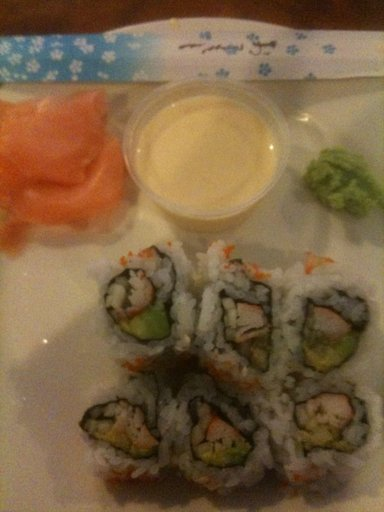

In [18]:
import random
from PIL import Image

random.seed(42)

# getting all images which end in jpg format
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

# open image
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class is {image_class}")
print(f"Image height is {img.height}")
print(f"Image width is {img.width}")
img

Text(0.5, 1.0, 'Image class: sushi | Image Shape: (512, 384, 3)')

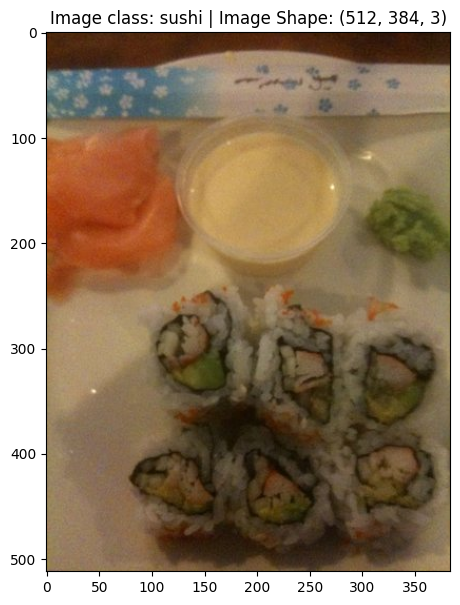

In [19]:
# Converting the image to a numpy array first
import numpy as np
import matplotlib.pyplot as plt
image_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(image_as_array)
plt.title(f"Image class: {image_class} | Image Shape: {image_as_array.shape}")

In [20]:
# Turning data into tensors
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [21]:
# Using transforms.Compose() to write a series of transformations on an image
data_transform = transforms.Compose([
    # Resize the image to 64*64 (most neural networks take this size)
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on horizontal axis
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image to torch.Tensor
    transforms.ToTensor() # converts all pixel values in [0,1]
])


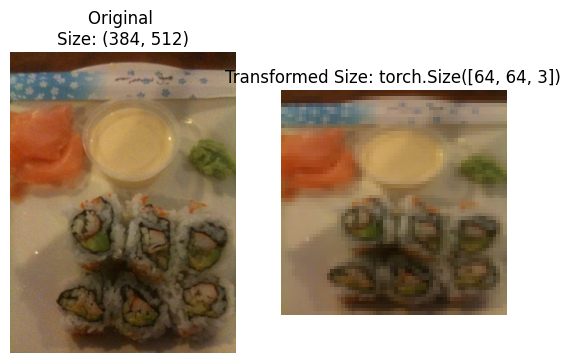

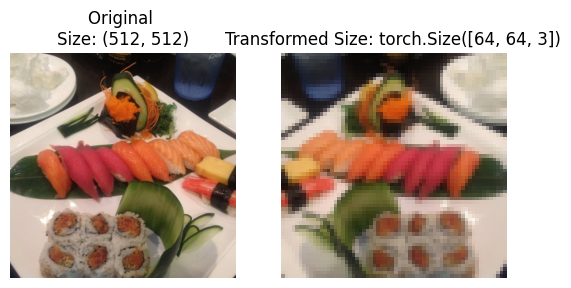

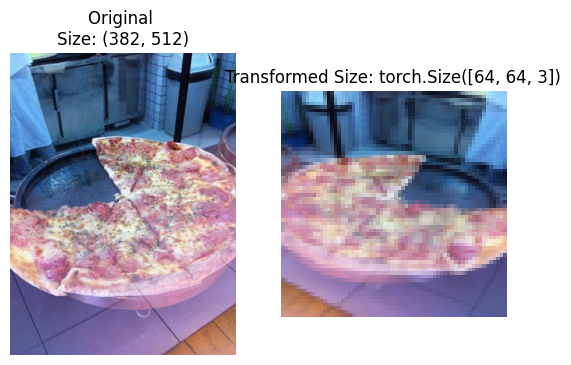

In [22]:
def plot_transformed_images(image_path, transform, n=3, seed=42):
  random.seed(seed)
  random_image_paths = random.sample(image_path, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      # Transform and plot image
      # Note - matplotlib default is (H, W, C) and PyTorch default is [C,H,W]. So we use permute function.
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed Size: {transformed_image.shape}")
      ax[1].axis("off")

plot_transformed_images(image_path_list, transform = data_transform, n=3)


In [23]:
# Doing this transformation on all images and using ImageFolder
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # transforms to perform on images
                                  target_transform=None) # if labels need transforming
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
print(f"Train data is {train_data} and test data is {test_data}")

Train data is Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/sampledata_20.0_percent/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ) and test data is Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/sampledata_20.0_percent/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [24]:
train_dir

PosixPath('data/sampledata_20.0_percent/train')

In [25]:
class_names = train_data.classes

In [26]:
class_dict = train_data.class_to_idx

In [27]:
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [28]:
train_data[0][0].shape

torch.Size([3, 64, 64])

In [29]:
# Turning image into Dataloaders (Iterable so a model can learn relationships between samples and targets)

from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cd6d13e59f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7cd6d13e4ac0>)

In [30]:
img, label = next(iter(train_dataloader))

print(f"The image shape is {img.shape}")
print(f"The label shape is {label.shape}")
print(f"The label is {label}")

The image shape is torch.Size([1, 3, 64, 64])
The label shape is torch.Size([1])
The label is tensor([1])


In [31]:
# Display random images
def display_random_images(dataset: torch.utils.data.dataset,
                          classes,
                          n: int=10,
                          display_shape: bool = True,
                          seed: int=None):
  random_samples_idx = random.sample(range(len(dataset)), k=n)
  print(random_samples_idx)

  plt.figure(figsize=(16,8))

  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title=f"class: {classes[targ_label]}"
    plt.title(title)



[62, 57, 35, 188, 26]


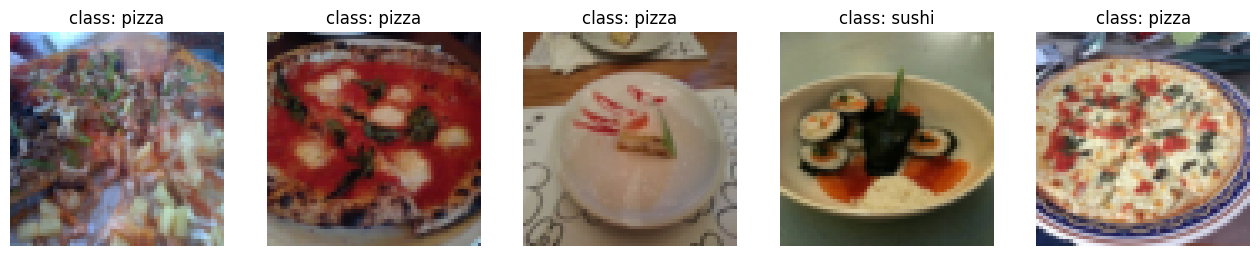

In [32]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

In [33]:
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

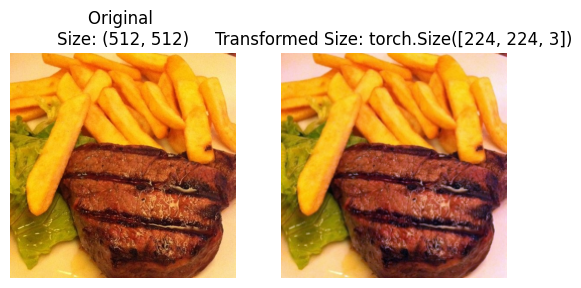

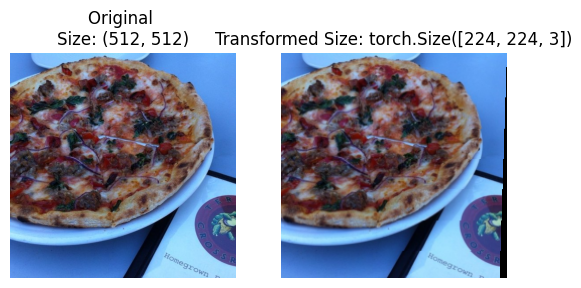

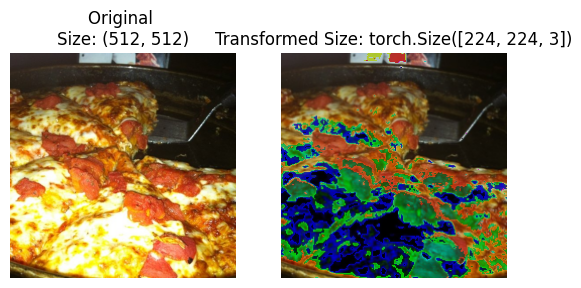

In [34]:
plot_transformed_images(image_path=image_path_list,
                        transform=train_transforms,
                        n=3,
                        seed=None)

In [35]:
# Testing TinyVGG without data augmentation. Using Simple Transform
simple_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [36]:
# Load and Transform Data
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transforms)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transforms)

# Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     shuffle=True,
                                     num_workers = NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size = BATCH_SIZE,
                                    shuffle=False,
                                    num_workers = NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7cd6d206bd60>,
 <torch.utils.data.dataloader.DataLoader at 0x7cd6d2069090>)

In [37]:
from torch import nn

In [38]:
class TinyVGG01(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion
    # This won't re-assign X again and again. It will calculate it once.
    return x

In [39]:
model_01 = TinyVGG01(input_shape = 3,
                    hidden_units = 10,
                    output_shape=len(train_data.classes))
model_01

TinyVGG01(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [40]:
img_batch, label_batch = next(iter(train_dataloader_simple))
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]

# Quickly doing a forward pass on the image
model_01.eval()
with torch.inference_mode():
  pred = model_01(img_single)

print(f"Output logits: {pred}\n")
print(f"Prediction probabilities: {torch.softmax(pred, dim=1)} \n")
print(f"Labels: {torch.argmax(torch.softmax(pred, dim=1), dim=1)}")
print(f"Actual Label: {label_single}")

Output logits: tensor([[-0.0370,  0.0094, -0.0506]])

Prediction probabilities: tensor([[0.3296, 0.3452, 0.3252]]) 

Labels: tensor([1])
Actual Label: 0


In [41]:
## Use torchinfo to get an idea on the shapes
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary
summary(model_01, input_size=[1, 3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG01                                [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [42]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  model.train()

  train_loss, train_acc = 0,0

  for batch, (X, y) in enumerate(dataloader):
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss, train_acc

In [43]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  model.eval()
  test_loss, test_acc = 0,0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels==y).sum().item()/len(test_pred_labels))

  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)
  return test_loss, test_acc

In [44]:
# combining the train_step and test_step function into one
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module=nn.CrossEntropyLoss(),
          epochs: int = 5):
  # Create a dictionary to populate the results
  results = {"train_loss": [],
             "train_acc":[],
             "test_loss": [],
             "test_acc": []
             }
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer)
    test_loss, test_acc = test_step(model=model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn)

  # Print whats happening
    print(
        f"Epoch: {epoch+1} | "
        f"Train Loss: {train_loss} |"
        f"Test Loss: {test_loss} |"
        f"Train Acc: {train_acc} |"
        f"Test Acc: {test_acc}")
    results["train_loss"].append(train_loss)
    results["test_loss"].append(test_loss)
    results["train_acc"].append(train_acc)
    results["test_acc"].append(test_acc)

  return results

In [45]:
# Use TinyVGG

torch.manual_seed(42)

NUM_EPOCHS = 15

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_01.parameters(), lr = 0.001)

model_01_results = train(model=model_01,
                         train_dataloader=train_dataloader_simple,
                         test_dataloader=test_dataloader_simple,
                         optimizer=optimizer,
                         loss_fn=loss_fn,
                         epochs=NUM_EPOCHS)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 1.106352299451828 |Test Loss: 1.099467356999715 |Train Acc: 0.25 |Test Acc: 0.2604166666666667
Epoch: 2 | Train Loss: 1.0835793986916542 |Test Loss: 1.1198609272638957 |Train Acc: 0.42578125 |Test Acc: 0.2604166666666667
Epoch: 3 | Train Loss: 1.0774038285017014 |Test Loss: 1.1479976971944172 |Train Acc: 0.42578125 |Test Acc: 0.2604166666666667
Epoch: 4 | Train Loss: 1.110844612121582 |Test Loss: 1.1529068152109783 |Train Acc: 0.3046875 |Test Acc: 0.2604166666666667
Epoch: 5 | Train Loss: 1.0791190564632416 |Test Loss: 1.1359538634618123 |Train Acc: 0.359375 |Test Acc: 0.3229166666666667
Epoch: 6 | Train Loss: 1.0625259578227997 |Test Loss: 1.1254530549049377 |Train Acc: 0.48046875 |Test Acc: 0.34375
Epoch: 7 | Train Loss: 1.0041425973176956 |Test Loss: 1.0669136047363281 |Train Acc: 0.57421875 |Test Acc: 0.3721590909090909
Epoch: 8 | Train Loss: 0.9688954129815102 |Test Loss: 1.0477579434712727 |Train Acc: 0.52734375 |Test Acc: 0.3333333333333333
Epoch: 9 | Trai

In [46]:
# plotting the model results and loss curves
def plot_loss_curves(results):
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # How many epochs we went through
  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")




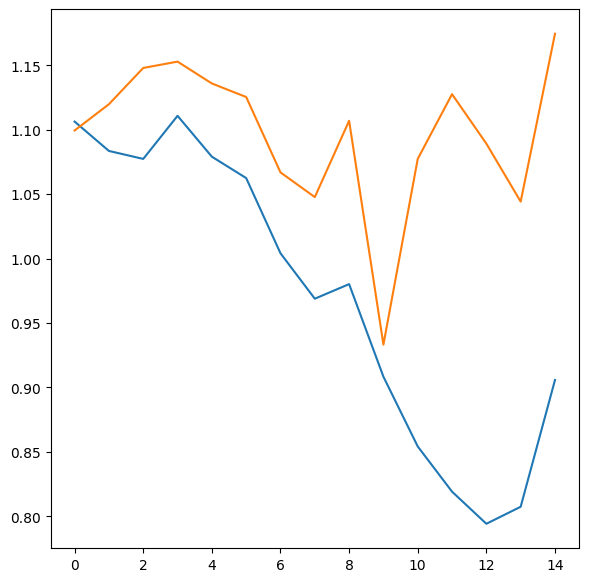

In [47]:
plot_loss_curves(model_01_results)

In [48]:
# Trying out a model with data augmentation
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms_trivial_augment = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()

])

In [49]:
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transforms_trivial_augment)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/sampledata_20.0_percent/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/sampledata_20.0_percent/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [50]:
# Making a dataloader
import os
BATCH_SIZE = 32

NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)

train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)
train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7cd6d2409030>,
 <torch.utils.data.dataloader.DataLoader at 0x7cd6d203d8a0>)

In [51]:
# Constructing and Training Model02

model_02 = TinyVGG01(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)
)
model_02

TinyVGG01(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [52]:
# Reuse train_step, test_step and train function

torch.manual_seed(42)

NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_02.parameters(), lr=0.001)

model_02_results = train(model=model_02,
                         train_dataloader = train_dataloader_augmented,
                         test_dataloader=test_dataloader_simple,
                         optimizer=optimizer,
                         loss_fn=loss_fn,
                         epochs=NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 1.1075671464204788 |Test Loss: 1.1062191327412922 |Train Acc: 0.25 |Test Acc: 0.2604166666666667
Epoch: 2 | Train Loss: 1.0791020393371582 |Test Loss: 1.138707458972931 |Train Acc: 0.42578125 |Test Acc: 0.2604166666666667
Epoch: 3 | Train Loss: 1.0809640660881996 |Test Loss: 1.169529398282369 |Train Acc: 0.42578125 |Test Acc: 0.2604166666666667
Epoch: 4 | Train Loss: 1.129194214940071 |Test Loss: 1.1624259948730469 |Train Acc: 0.3046875 |Test Acc: 0.2604166666666667
Epoch: 5 | Train Loss: 1.0900295078754425 |Test Loss: 1.1480361620585124 |Train Acc: 0.42578125 |Test Acc: 0.2604166666666667
